# Performing SVD of an RGB Image

### Including Libraries used

In [0]:
import numpy as np
import pandas as pd
from numpy.linalg import svd
import matplotlib.pyplot as plt
%matplotlib inline

### Function to perform SVD of RGB Image

In [0]:
def img_svd(img, k):
    # Separating out the three colors
    red, green, blue = img[:,:,0], img[:,:,1], img[:,:,2]
    
    # Calculating the svd for each color
    U_red, S_red, V_red = svd(red, full_matrices=False)
    U_green, S_green, V_green = svd(green, full_matrices=False)
    U_blue, S_blue, V_blue = svd(blue, full_matrices=False)
    
    # Selecting only the top k features
    final_red = U_red[:,:k] @ ( np.diag(S_red[:k]) @ V_red[:k,:] )
    final_green = U_green[:,:k] @ ( np.diag(S_green[:k]) @ V_green[:k,:] )
    final_blue = U_blue[:,:k] @ ( np.diag(S_blue[:k]) @ V_blue[:k,:] )
    
    # Final Image
    fimg = np.zeros(img.shape)
    
    # Adding matrix for R, G & B in created array
    fimg[:,:,0], fimg[:,:,1], fimg[:,:,2] = final_red, final_green, final_blue
    
    # Adjusting values to the range 0-255
    for i in range(len(fimg)):
        for j in range(len(fimg[i])):
            for w in range(len(fimg[i][j])):
                fimg[i,j,w] = min(255, abs(fimg[i,j,w]))

    # Needed to convert to image object
    fimg = fimg.astype(np.uint8)
    return fimg

### Utility Plotting Function

In [0]:
def plot(l, ks):
    fig, ax = plt.subplots(1,len(l), figsize=(24, 45))
    names = ["K = "+str(i)+"\n" for i in ks]+["Original Image\n"]
    for i in range(len(l)):
        ax[i].set_title(names[i])
        ax[i].imshow(l[i])
        ax[i].axis('off')
    plt.show()

### Reading the Image



In [4]:
image_name = "https://raw.githubusercontent.com/kishen19/SVD-of-RGB-Image/master/prob5.png"
image = plt.imread(image_name)*255 # to scale up the values
print(image.shape)

(768, 1024, 3)


### Running the SVD Code on given image

In [0]:
ks = [1,2,4,16]
outs = []
for k in ks:
    outs.append(img_svd(image, k))
outs.append(image/255) 

### Plotting Output

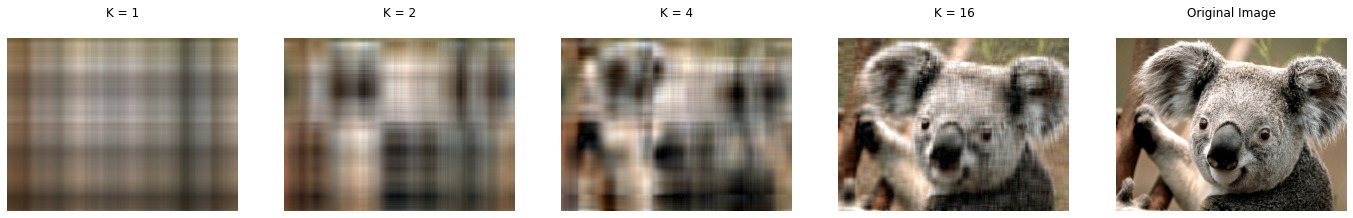

In [6]:
plot(outs, ks)

As we can see, the quality of the image is very bad when k=1. But as we go with higher values of k, the object in the image becomes clear enough to identify as k approaches 16.

### Calculating percentage of Frobenius Norm captured

In [0]:
def FN(img):
    return np.linalg.norm(img)

In [37]:
FNT = FN(image)
outp = [FN(i)*100/FNT for i in outs[:-1]]
outp.append(100) # Original Image
outp = pd.concat([pd.Series(["k = %d"%i for i in ks]+["Original"]), pd.Series(outp)],axis=1)
df = pd.DataFrame(outp)
df.columns = ["K value","% of Frobenius Norm"]
print(df)

    K value  % of Frobenius Norm
0     k = 1            89.986621
1     k = 2            92.807995
2     k = 4            95.385245
3    k = 16            97.954441
4  Original           100.000000
